<a href="https://colab.research.google.com/github/109368018yumin/project/blob/main/Remove_RF_LR_0224_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Remove Outliers**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/dissertation/UIC_data/output/
df_all = pd.read_csv("NORMAL_BLOOD_PRESSURE2.csv") 

num_features = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

Mounted at /content/gdrive
/content/gdrive/MyDrive/dissertation/UIC_data/output


,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.352,0.128,0.636364,121.62,67.063


In [2]:
df.describe()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,29004.000000,29004.000000,29004.000000,29004.000000,29004.000000,29004.000000,29004.000000,29004.000000
mean,0.258379,0.213564,0.660054,0.471943,0.188110,0.564890,115.308431,66.173117
std,0.046686,0.098451,0.128950,0.096254,0.059333,0.132572,9.956691,4.893083
min,0.008000,0.016000,0.328000,0.136000,0.088000,0.010526,80.104000,60.020000
25%,0.224000,0.136000,0.560000,0.392000,0.152000,0.454545,108.820000,62.179000
50%,0.256000,0.200000,0.624000,0.456000,0.176000,0.575758,116.640000,65.256000
75%,0.288000,0.296000,0.752000,0.536000,0.216000,0.659091,123.440000,68.675000
max,0.664000,0.936000,1.848000,1.144000,1.296000,0.960526,129.970000,79.997000


In [4]:
ft = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
remove = set()
indices = set()
for x in ft:
  q25, q75 = np.percentile(df.loc[:,x], [25, 75])
  n=1.5  #1.5倍四分位距
  #IQR=Q3-Q1
  intra = q75 - q25
  # outlier = Q3 + n*IQR 
  max = q75 + intra *n
  # outlier = Q1 - n*IQR 
  min = q25 - intra *n
  
  transform_data1 = df.loc[df[x] < min, x].index
  transform_data2 = df.loc[df[x] > max, x].index
  remove = remove.union(transform_data1).union(transform_data2)
  


In [5]:
df.drop(remove, inplace=True)
df.to_csv('remove0224_3.csv')
#########remove outliers###########

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
!pip install rfpimp

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_all = pd.read_csv("remove0224_3.csv") 

num_features = ['PTT', 'PPG_DBP_Time_divide_PTT','PPG_one_wave_time', 'PPG_DBP_Time','PPG_Amplitude_time','PTT_DBP_percent']
target = ['SBP','DBP']

df = df_all[num_features + target]
df.head()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
0,0.224,0.144,0.496,0.368,0.128,0.608696,118.35,66.135
1,0.232,0.136,0.488,0.368,0.120,0.630435,119.57,66.135
2,0.240,0.128,0.496,0.368,0.128,0.652174,122.35,67.503
3,0.232,0.128,0.488,0.360,0.128,0.644444,122.75,67.600
4,0.224,0.128,0.480,0.352,0.128,0.636364,121.62,67.063


In [8]:
df.describe()

,PTT,PPG_DBP_Time_divide_PTT,PPG_one_wave_time,PPG_DBP_Time,PPG_Amplitude_time,PTT_DBP_percent,SBP,DBP
count,27378.000000,27378.000000,27378.000000,27378.000000,27378.000000,27378.000000,27378.000000,27378.00000
mean,0.256644,0.209918,0.646824,0.466562,0.180262,0.566971,114.973734,66.20172
std,0.042078,0.093057,0.112844,0.088728,0.040084,0.127745,9.964597,4.92068
min,0.136000,0.016000,0.360000,0.200000,0.088000,0.244186,80.446000,60.02000
25%,0.224000,0.136000,0.552000,0.392000,0.152000,0.457143,108.430000,62.17900
50%,0.256000,0.192000,0.608000,0.448000,0.168000,0.577778,116.110000,65.25600
75%,0.280000,0.288000,0.744000,0.536000,0.208000,0.659454,123.090000,68.72400
max,0.376000,0.528000,1.040000,0.752000,0.312000,0.959184,129.970000,79.99700


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


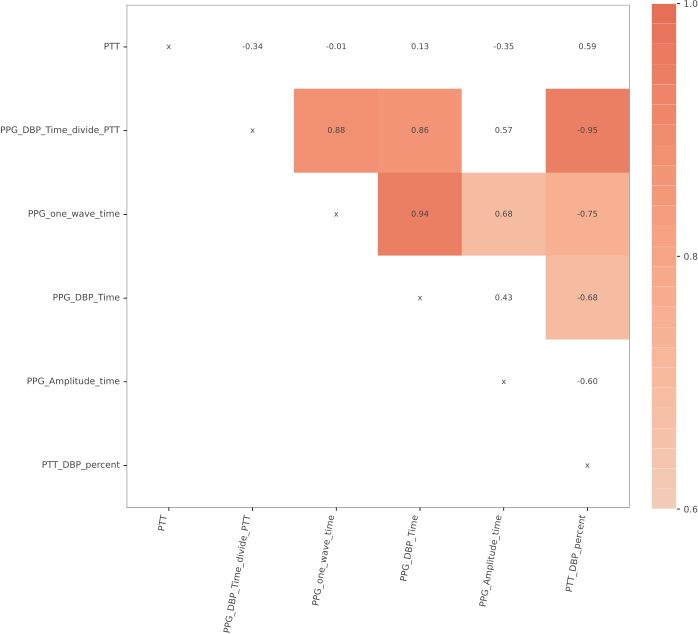

In [9]:
df_target = pd.DataFrame(df, columns=["SBP", "DBP"])
df.drop(["SBP", "DBP"], axis=1, inplace=True)
df_target.head()

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
folds = KFold(n_splits=10, shuffle=True)

# resplit the data after processing
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3)

from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(x_train,figsize=(10,10))
viz


**RandomForest Regressor**

MAE SBP: 5.623186293199611 SD:7.815120306377346 MAE DBP: 2.721749709780916 SD:3.8771827524791798


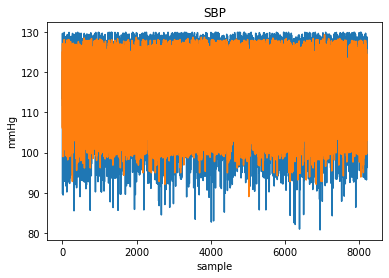

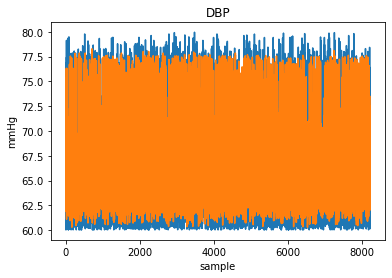

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**Linear Regression**

MAE SBP: 8.138989511763189 SD:9.88479460738425 MAE DBP: 3.8420069682464573 SD:4.7432562288588525


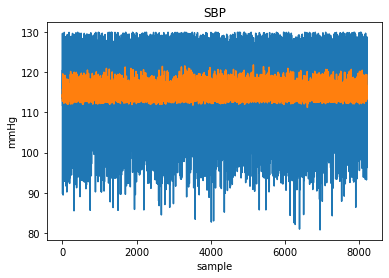

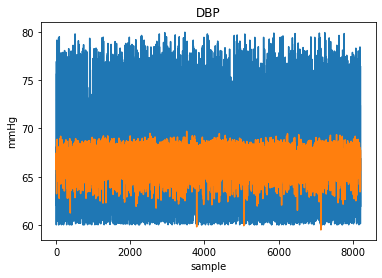

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(x_train, y_train)
prediction = linear.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["SBP"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["DBP"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["SBP"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["DBP"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["SBP"])
d = np.vstack(y_test["DBP"])

plt.figure(1)
plt.title("SBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("DBP")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

**K_Fold**

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
forest = RandomForestRegressor(n_estimators=100)
errors_sbp = []
errors_dbp = []

errors_sbp_std = []
errors_dbp_std = []

for i, (train_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    train_data, train_target = x_train.iloc[train_idx], y_train.iloc[train_idx]
    val_data, val_target = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    forest.fit(train_data, train_target) 
    predictions = forest.predict(val_data)

    error_sbp = mean_absolute_error(predictions[:,0], val_target["SBP"].values)
    error_dbp = mean_absolute_error(predictions[:,1], val_target["DBP"].values)

    error_sbp_std = np.std(predictions[:,0] - val_target["SBP"].values)
    error_dbp_std = np.std(predictions[:,1] - val_target["DBP"].values)

    print(f"Train fold {i} MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

    errors_sbp.append(error_sbp)
    errors_dbp.append(error_dbp)
    errors_sbp_std.append(error_sbp_std)
    errors_dbp_std.append(error_dbp_std)
    
print(f"Average MAE SBP: {np.mean(errors_sbp)} SD:{np.mean(errors_sbp_std)} MAE DBP: {np.mean(errors_dbp)} SD:{np.mean(errors_dbp_std)}")

Train fold 0 MAE SBP: 5.306088128709431 SD:7.353987602971955 MAE DBP: 2.6772613704508395 SD:3.846183067229196
Train fold 1 MAE SBP: 5.462708831582934 SD:7.574102949438328 MAE DBP: 2.6076077189972113 SD:3.769143625689249
Train fold 2 MAE SBP: 5.4840505787656495 SD:7.579341844606176 MAE DBP: 2.870410921138183 SD:3.995254670440117
Train fold 3 MAE SBP: 5.4535622457525035 SD:7.582397916983939 MAE DBP: 2.756072256953015 SD:3.9182593447266836
Train fold 4 MAE SBP: 5.5212632719859 SD:7.635328308364435 MAE DBP: 2.713214845871835 SD:3.8237980445791737
Train fold 5 MAE SBP: 5.486359866288827 SD:7.631717396822668 MAE DBP: 2.6076057943368443 SD:3.7326330657669877
Train fold 6 MAE SBP: 5.528119524176177 SD:7.677596786030765 MAE DBP: 2.761856374412771 SD:3.941439240137471
Train fold 7 MAE SBP: 5.357020721457262 SD:7.413852133255642 MAE DBP: 2.7242937458492085 SD:3.9109840213497042
Train fold 8 MAE SBP: 5.627711337392614 SD:7.885842594031123 MAE DBP: 2.8369972740585507 SD:4.005245289827156
Train fold

**Feature Importances**

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error ,r2_score

#print('The mean absolute error is' , mean_absolute_error(predictions,y_test ))
#print('The mean squared error is' , mean_squared_error(predictions,y_test ))
#print('The R squared error is' , r2_score(predictions,y_test))

import pandas as pd
feature_imp = pd.Series(forest.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

#PPG_Amplitude_time                      波谷到波峰
#PPG_DBP_Time                            波峰到波谷
#PTT_DBP_percent                         NR-PTT  PTT在舒張期間所經過的時間比例
#PTT                                     波峰到重搏波
#PPG_DBP_Time_divide_PTT                 重搏波到波谷
#PPG_one_wave_time                       波峰到波峰

PPG_Amplitude_time         0.388822
PPG_DBP_Time               0.175762
PTT_DBP_percent            0.137545
PPG_one_wave_time          0.118228
PTT                        0.094181
PPG_DBP_Time_divide_PTT    0.085462
dtype: float64